In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# EDA

In [9]:
data=pd.read_csv("cryptocurrancy.csv")
data.head(5)

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["symbol"]=le.fit_transform(data["symbol"])
data["date"]=pd.to_datetime(data["date"])
data.set_index("date",inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1334 entries, 2021-12-27 to 2018-05-04
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   symbol       1334 non-null   int64  
 2   open         1334 non-null   float64
 3   high         1334 non-null   float64
 4   low          1334 non-null   float64
 5   close        1334 non-null   float64
 6   Volume XRP   1334 non-null   float64
 7   Volume USDT  1334 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 93.8 KB


<Axes: xlabel='date', ylabel='close'>

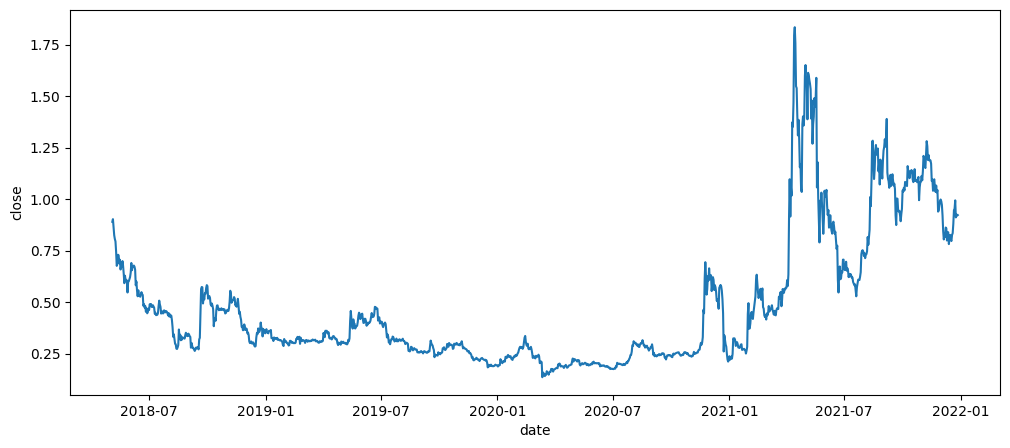

In [13]:
plt.figure(figsize=(12,5))
sns.lineplot(x="date",y="close",data=data)

# Data Preprocessing

In [14]:
df=data[["close"]].values

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [19]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range (sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [20]:
sequence_length=10

In [21]:
X,y=create_sequence(scaler_data,sequence_length)

In [30]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(1324, 10, 1) (1324,)


# Model 

In [31]:
model=Sequential()

In [32]:
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

In [33]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0587  
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Ep

# Model Evaluation

In [36]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.0013    
Model loss: 0.0007921012584120035


In [37]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:10])

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0.8446838 ]
 [0.8151738 ]
 [0.8059858 ]
 [0.81481594]
 [0.81536597]
 [0.8018077 ]
 [0.81940585]
 [0.83384794]
 [0.8235791 ]
 [0.84171486]]


In [38]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

# Actual Vs Predicted

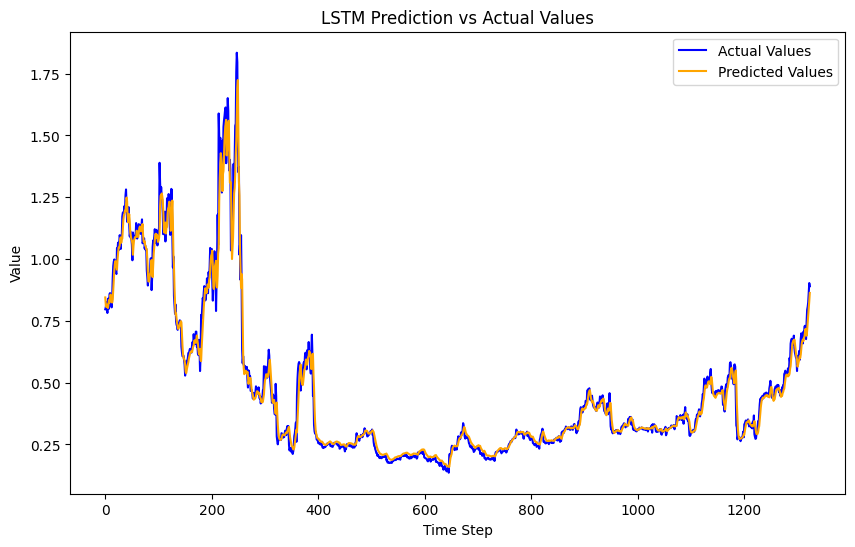

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")  
plt.plot(predictions, label="Predicted Values",color="orange") 
plt.legend()
plt.title('LSTM Prediction vs Actual Values')  
plt.xlabel('Time Step') 
plt.ylabel('Value')  
plt.show()